In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import GlobalAveragePooling2D

In [2]:
# Dataset directories
train_dir = '/Users/geraldalanraja/Documents/Projects/COVID-19 Detection from Chest CT/Dataset/Processed/train'
val_dir = '/Users/geraldalanraja/Documents/Projects/COVID-19 Detection from Chest CT/Dataset/Processed/val'

In [3]:
# Image preprocessing
img_size = 128
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=(img_size, img_size),
                                           class_mode='binary', batch_size=batch_size)
val_data = val_gen.flow_from_directory(val_dir, target_size=(img_size, img_size),
                                       class_mode='binary', batch_size=batch_size)

Found 1736 images belonging to 2 classes.
Found 371 images belonging to 2 classes.


In [ ]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Save best model
checkpoint = ModelCheckpoint('models/covid_cnn_model.keras', save_best_only=True, monitor='val_accuracy')

In [17]:
# Train
history = model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[checkpoint])

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5289 - loss: 0.6959 - val_accuracy: 0.5040 - val_loss: 0.6928
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.5204 - loss: 0.6920 - val_accuracy: 0.6631 - val_loss: 0.6927
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5191 - loss: 0.6925 - val_accuracy: 0.6496 - val_loss: 0.6924
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5081 - loss: 0.6932 - val_accuracy: 0.5957 - val_loss: 0.6913
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5330 - loss: 0.6911 - val_accuracy: 0.5472 - val_loss: 0.6891
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6127 - loss: 0.6852 - val_accuracy: 0.5094 - val_loss: 0.6667
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5944 - loss: 0.6621 - val_accuracy: 0.6900 - val_loss: 0.5837
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6624 - loss: 0.6082 - val_accuracy: 0.8005 - v

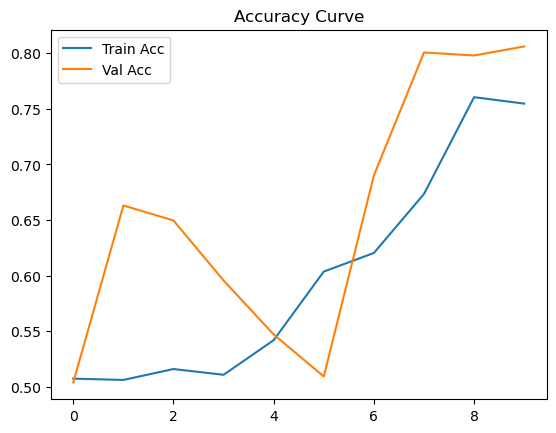

In [19]:
# Plot training
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()